In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 454.3MB 38kB/s 


In [ ]:
!nvidia-smi

Mon Jun 21 04:38:06 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.style.use('classic')
#############################################################
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
#from keras import backend as K
####################################################
import os
import cv2
from PIL import Image
import numpy as np

In [ ]:
image_directory = '/content/drive/MyDrive/Classification2/train/'
SIZE = 224
dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
label = []

In [ ]:
Benign_images = os.listdir(image_directory + 'benign/')
for i, image_name in enumerate(Benign_images):   #Remember enumerate method adds a counter and returns the enumerate object
    
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'benign/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [ ]:
Malignant_images = os.listdir(image_directory + 'malignant/')
for i, image_name in enumerate(Malignant_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'malignant/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [ ]:
dataset = np.array(dataset)
label = np.array(label)

In [ ]:
from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical

X_train, X_val, y_train, y_val = train_test_split(dataset, label, test_size = 0.20, random_state = 0)

In [ ]:

X_train = X_train/255
X_val = X_val/255

In [ ]:
INPUT_SHAPE = (SIZE, SIZE, 3) 

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid')) 

In [ ]:
from tensorflow.keras.optimizers import Adam


model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-4),             #also try adam
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 52, 52, 64)       

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau

# Learning Rate Reducer
learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)

# Checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
BATCH_SIZE=16
history = model.fit(X_train, 
                         y_train, 
                         batch_size = BATCH_SIZE, 
                         verbose = 1, 
                         epochs = 20,      
                         steps_per_epoch=X_train.shape[0] / BATCH_SIZE,
                         validation_data=(X_val,y_val),
                         shuffle = False,
                        callbacks=[learn_control, checkpoint]
                     )

Epoch 1/20
57/57 [==============================] - 49s 838ms/step - loss: 0.6556 - accuracy: 0.6492 - val_loss: 0.5249 - val_accuracy: 0.7261

Epoch 00001: val_accuracy improved from -inf to 0.72609, saving model to weights.best.hdf5
Epoch 2/20
57/57 [==============================] - 48s 837ms/step - loss: 0.5595 - accuracy: 0.7124 - val_loss: 0.4634 - val_accuracy: 0.7652

Epoch 00002: val_accuracy improved from 0.72609 to 0.76522, saving model to weights.best.hdf5
Epoch 3/20
57/57 [==============================] - 48s 833ms/step - loss: 0.5468 - accuracy: 0.7211 - val_loss: 0.4609 - val_accuracy: 0.7565

Epoch 00003: val_accuracy did not improve from 0.76522
Epoch 4/20
57/57 [==============================] - 48s 841ms/step - loss: 0.5137 - accuracy: 0.7505 - val_loss: 0.4408 - val_accuracy: 0.8304

Epoch 00004: val_accuracy improved from 0.76522 to 0.83043, saving model to weights.best.hdf5
Epoch 5/20
57/57 [==============================] - 48s 832ms/step - loss: 0.5157 - accura

In [ ]:
model.save('custommodel12.h5')  

The prediction for this image is:  [[0.3779621]]
The actual label for this image is:  1


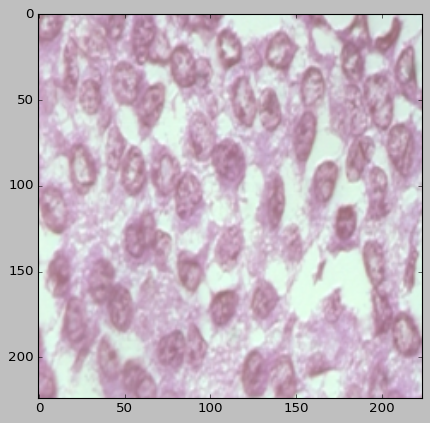

In [ ]:
n=24  #Select the index of image to be loaded for testing
img = X_val[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_val[n])

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import os

In [ ]:
modelef = tf.keras.models.load_model('custommodel12.h5')

In [ ]:
#path = '/content/drive/MyDrive/Classification/Test/Benign/SOB_B_PT-14-22704-400-038.png'
path ='/content/drive/MyDrive/Classification/Test/Malignant/SOB_M_LC-14-16196-400-007.png'
img = image.load_img(path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
images/=255
classes = modelef.predict(images)
print(classes)
if classes[0]<0.5:
    print("Given image is Benign")
else:
    print("Given image is malignant")

[[0.96892625]]
Given image is malignant


In [ ]:
mythreshold=0.908
from sklearn.metrics import confusion_matrix

y_pred = (model.predict(X_val)>= mythreshold).astype(int)

Confusion matrix, without normalization
[[ 61   2]
 [106  61]]


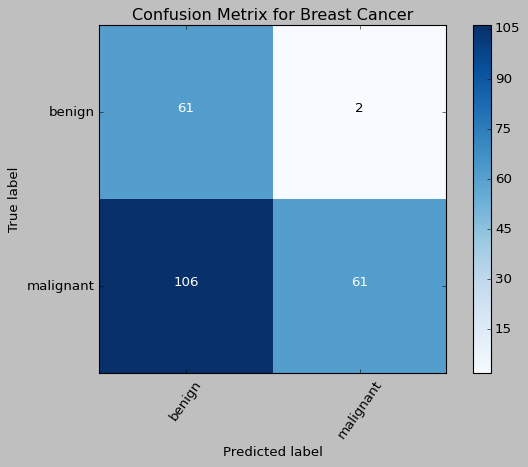

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools    

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=55)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm=confusion_matrix(y_val, y_pred)  

cm_plot_label =['benign', 'malignant']
plot_confusion_matrix(cm, cm_plot_label, title ='Confusion Metrix for Breast Cancer')

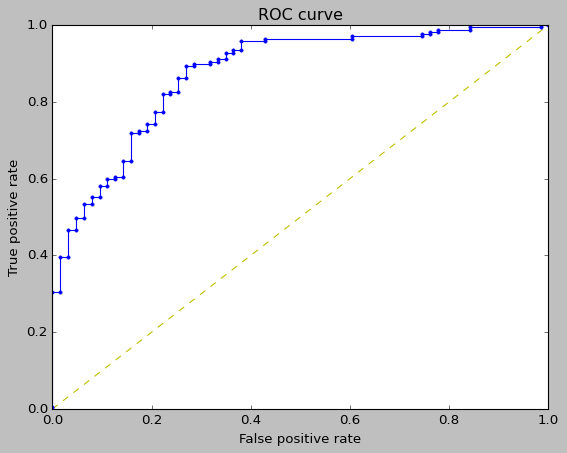

In [ ]:
from sklearn.metrics import roc_curve
y_preds = model.predict(X_val).ravel()

fpr, tpr, thresholds = roc_curve(y_val, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [ ]:
import pandas as pd
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 

Ideal threshold is:  29    0.78058
Name: thresholds, dtype: float32


In [ ]:
from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

Area under curve, AUC =  0.874251497005988


In [ ]:
cls=[]
correctr=0
incorrectr=0
lists=['/content/drive/MyDrive/Classification/Test/Benign/','/content/drive/MyDrive/Classification/Test/Malignant/']
for j in lists:
    for i in os.listdir(j):
        path=j+i
        img = image.load_img(path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)

        images = np.vstack([x])
        images/=255.0
        classes = modelef.predict(images)
        if classes[0]<0.7:
            p='B'   
        else:
            p='M'

        if p==path.split('_')[1]:
            correctr=correctr+1
        else:
            incorrectr=incorrectr+1

In [ ]:
print("Total images : 456")
print("Correct : "+ str(correctr))
print("Incorrect : "+ str(incorrectr))

Total images : 456
Correct : 350
Incorrect : 106
